In [143]:
import gym
import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable

In [144]:
#N_STEPS = 5
SEED = 1
N_GAMES = 20
N_ACTIONS = 2
N_INPUTS = 4

N_STEPS = 20
N_ENVS = 1
LR = 3e-3
GAMMA = .95

[array([-0.0106416 ,  0.04909239,  0.01223504, -0.03744194])] 
1.00000e-02 *
 -1.0642  4.9092  1.2235 -3.7442
[torch.FloatTensor of size 1x4]

[array([-0.00965975,  0.24403677,  0.01148621, -0.32623962])] 
-0.0097  0.2440  0.0115 -0.3262
[torch.FloatTensor of size 1x4]

[array([-0.00477901,  0.04875319,  0.00496141, -0.02995669])] 
1.00000e-02 *
 -0.4779  4.8753  0.4961 -2.9957
[torch.FloatTensor of size 1x4]

[array([-0.00380395, -0.14643956,  0.00436228,  0.26428748])] 
-0.0038 -0.1464  0.0044  0.2643
[torch.FloatTensor of size 1x4]

[array([-0.00673274, -0.3416235 ,  0.00964803,  0.55834312])] 
-0.0067 -0.3416  0.0096  0.5583
[torch.FloatTensor of size 1x4]

[array([-0.01356521, -0.14663831,  0.02081489,  0.26871541])] 
-0.0136 -0.1466  0.0208  0.2687
[torch.FloatTensor of size 1x4]

[array([-0.01649798, -0.34205103,  0.0261892 ,  0.56789013])] 
-0.0165 -0.3421  0.0262  0.5679
[torch.FloatTensor of size 1x4]

[array([-0.023339  , -0.53753035,  0.037547  ,  0.86870731])] 
-0.0233 -0.

[array([ 0.11918599,  1.35617173, -0.20204696, -2.27612775])] 
 0.1192  1.3562 -0.2020 -2.2761
[torch.FloatTensor of size 1x4]

[array([-0.03830472,  0.02130362,  0.00668667, -0.03257554])] 
1.00000e-02 *
 -3.8305  2.1304  0.6687 -3.2576
[torch.FloatTensor of size 1x4]

[array([-0.03787865,  0.21632904,  0.00603516, -0.32314127])] 
-0.0379  0.2163  0.0060 -0.3231
[torch.FloatTensor of size 1x4]

[array([-0.03355207,  0.02112168, -0.00042766, -0.02856123])] 
1.00000e-02 *
 -3.3552  2.1122 -0.0428 -2.8561
[torch.FloatTensor of size 1x4]

[array([-0.03312964, -0.17399414, -0.00099889,  0.26398673])] 
-0.0331 -0.1740 -0.0010  0.2640
[torch.FloatTensor of size 1x4]

[array([-0.03660952,  0.02114205,  0.00428085, -0.02901109])] 
1.00000e-02 *
 -3.6610  2.1142  0.4281 -2.9011
[torch.FloatTensor of size 1x4]

[array([-0.03618668, -0.17404102,  0.00370062,  0.26501941])] 
-0.0362 -0.1740  0.0037  0.2650
[torch.FloatTensor of size 1x4]

[array([-0.0396675 ,  0.02102791,  0.00900101, -0.02649401]

[array([-0.01746355,  0.41801558, -0.06003258, -0.65455577])] 
-0.0175  0.4180 -0.0600 -0.6546
[torch.FloatTensor of size 1x4]

[array([-0.00910324,  0.61391974, -0.0731237 , -0.96552164])] 
-0.0091  0.6139 -0.0731 -0.9655
[torch.FloatTensor of size 1x4]

[array([ 0.00317515,  0.80994366, -0.09243413, -1.28025096])] 
 0.0032  0.8099 -0.0924 -1.2803
[torch.FloatTensor of size 1x4]

[array([ 0.01937403,  0.61611305, -0.11803915, -1.01788319])] 
 0.0194  0.6161 -0.1180 -1.0179
[torch.FloatTensor of size 1x4]

[array([ 0.03169629,  0.42274545, -0.13839682, -0.76447311])] 
 0.0317  0.4227 -0.1384 -0.7645
[torch.FloatTensor of size 1x4]

[array([ 0.0401512 ,  0.61947436, -0.15368628, -1.09730381])] 
 0.0402  0.6195 -0.1537 -1.0973
[torch.FloatTensor of size 1x4]

[array([ 0.05254068,  0.42667272, -0.17563235, -0.85651614])] 
 0.0525  0.4267 -0.1756 -0.8565
[torch.FloatTensor of size 1x4]

[array([ 0.06107414,  0.23432275, -0.19276268, -0.62380065])] 
 0.0611  0.2343 -0.1928 -0.6238
[torch.Fl

[array([-0.0455623 , -0.22916008,  0.00186557,  0.28909354])] 
-0.0456 -0.2292  0.0019  0.2891
[torch.FloatTensor of size 1x4]

[array([-0.0501455 , -0.42430859,  0.00764744,  0.58236427])] 
-0.0501 -0.4243  0.0076  0.5824
[torch.FloatTensor of size 1x4]

[array([-0.05863167, -0.22929461,  0.01929472,  0.29210018])] 
-0.0586 -0.2293  0.0193  0.2921
[torch.FloatTensor of size 1x4]

[array([-0.06321756, -0.03445301,  0.02513673,  0.00556448])] 
1.00000e-02 *
 -6.3218 -3.4453  2.5137  0.5564
[torch.FloatTensor of size 1x4]

[array([-0.06390662, -0.22992627,  0.02524802,  0.30607116])] 
-0.0639 -0.2299  0.0252  0.3061
[torch.FloatTensor of size 1x4]

[array([-0.06850515, -0.03517303,  0.03136944,  0.02145654])] 
1.00000e-02 *
 -6.8505 -3.5173  3.1369  2.1457
[torch.FloatTensor of size 1x4]

[array([-0.06920861, -0.23073048,  0.03179857,  0.3238695 ])] 
-0.0692 -0.2307  0.0318  0.3239
[torch.FloatTensor of size 1x4]

[array([-0.07382322, -0.0360754 ,  0.03827596,  0.0413817 ])] 
1.00000e-02

[array([-0.10423551, -0.96599264,  0.16162038,  1.6131712 ])] 
-0.1042 -0.9660  0.1616  1.6132
[torch.FloatTensor of size 1x4]

[array([-0.12355536, -0.77310533,  0.1938838 ,  1.37492064])] 
-0.1236 -0.7731  0.1939  1.3749
[torch.FloatTensor of size 1x4]

[array([ 0.00338149, -0.04181399,  0.04527416, -0.01419035])] 
1.00000e-02 *
  0.3381 -4.1814  4.5274 -1.4190
[torch.FloatTensor of size 1x4]

[array([ 0.00254521, -0.23755501,  0.04499035,  0.29242636])] 
 0.0025 -0.2376  0.0450  0.2924
[torch.FloatTensor of size 1x4]

[array([-0.00220589, -0.4332886 ,  0.05083888,  0.59895235])] 
-0.0022 -0.4333  0.0508  0.5990
[torch.FloatTensor of size 1x4]

[array([-0.01087167, -0.62908361,  0.06281793,  0.90720562])] 
-0.0109 -0.6291  0.0628  0.9072
[torch.FloatTensor of size 1x4]

[array([-0.02345334, -0.8249972 ,  0.08096204,  1.21895269])] 
-0.0235 -0.8250  0.0810  1.2190
[torch.FloatTensor of size 1x4]

[array([-0.03995328, -1.02106413,  0.10534109,  1.53586656])] 
-0.0400 -1.0211  0.1053  1

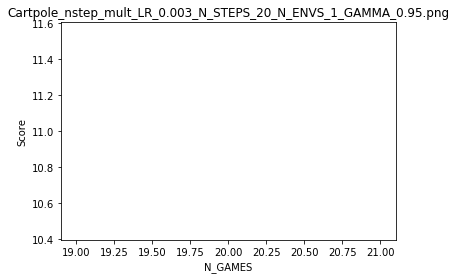

In [153]:
run_set(N_STEPS, N_ENVS, LR, GAMMA)

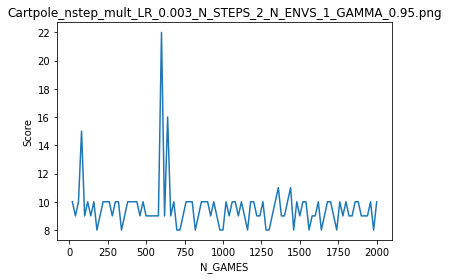

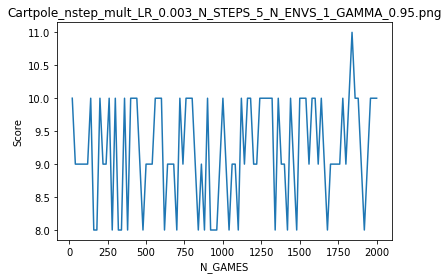

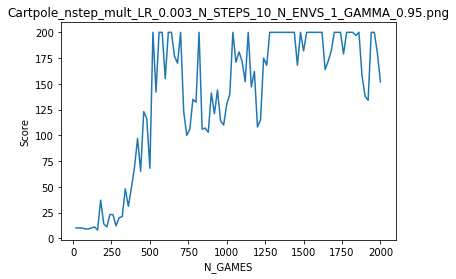

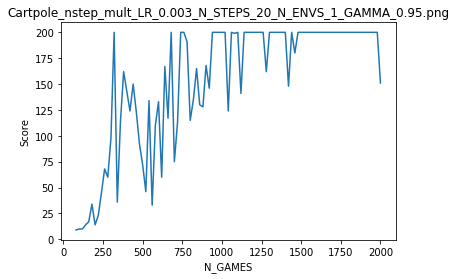

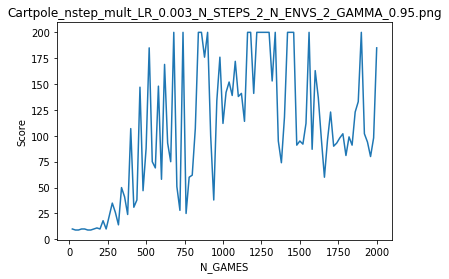

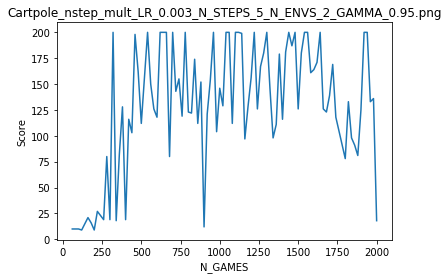

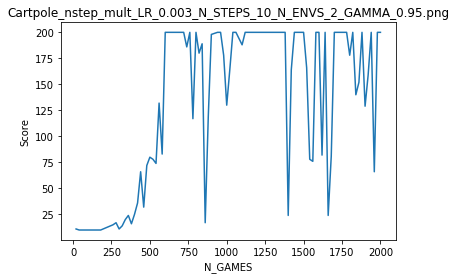

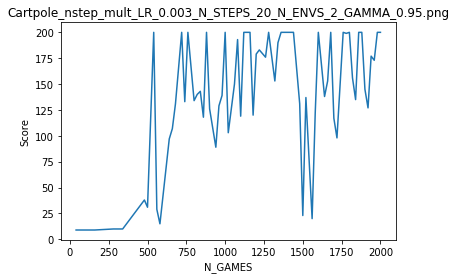

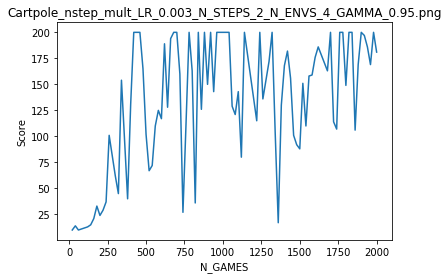

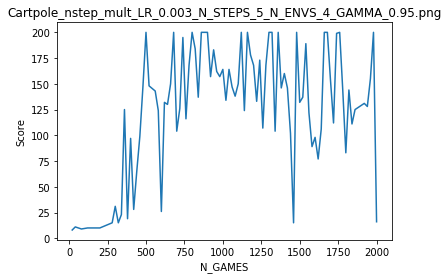

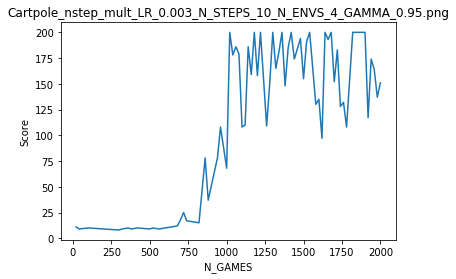

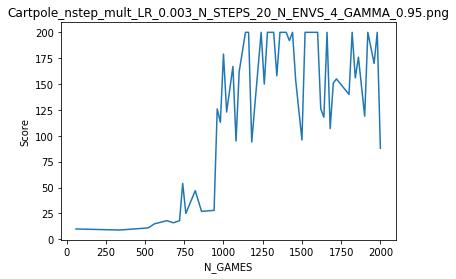

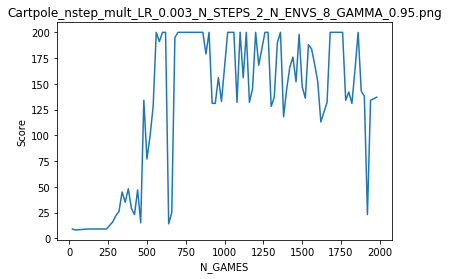

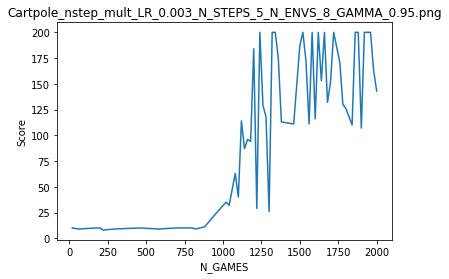

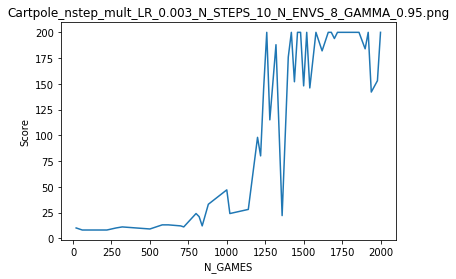

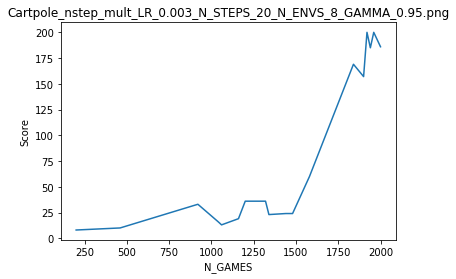

In [142]:
for e in [1,2,4,8]:
    for s in [2,5,10,20]:
        run_set(s, e, LR, GAMMA)

In [152]:
def run_set(N_STEPS, N_ENVS, LR, GAMMA):
    num_games = []
    scores = []
    
    states_memory = []
    actions_memory = []
    rewards_memory = []
    dones_memory = []
    cum_scores_memory = []

    torch.manual_seed(SEED)
    np.random.seed(SEED)

    global model

    envs = Envs(N_ENVS)

    model = ActorCritic()
    optimizer = optim.Adam(model.parameters(), lr=LR)
    states = envs.reset()

    while envs.finished_games < N_GAMES: 

        del states_memory[:]
        del actions_memory[:]
        del rewards_memory[:]
        del dones_memory[:]
        del cum_scores_memory[:]

        # act phase
        for step in range(N_STEPS):
            s = torch.from_numpy(np.array(states)).float()#.unsqueeze(0) no need now that we've got mult
            print(states, s)

            action_probs = model.get_action_probs(Variable(s))
            actions = action_probs.multinomial().data.squeeze(1).numpy()
            next_states, rewards, dones, cum_scores = envs.step(actions)

            states_memory.append(states)
            actions_memory.append(actions)
            rewards_memory.append(rewards)
            dones_memory.append(dones)
            cum_scores_memory.append(cum_scores)
            
            states = next_states # FORGOT THIS LINE!! WAS JUST USING SAME STATES OVER AND OVER!!

        global dones_list, cum_scores_list
        dones_list = np.resize(np.array(dones_memory), (N_STEPS*N_ENVS)) 
        cum_scores_list = np.resize(np.array(cum_scores_memory), (N_STEPS*N_ENVS)) 
        
        if True in dones_list:
            # Reflect phase
            R = np.zeros((N_STEPS, N_ENVS))

            rr = rewards_memory
            rr.reverse()
            dones_memory.reverse()

            s = torch.from_numpy(np.array(states_memory[-1])).float()

            next_returns = model.get_state_value(Variable(s)).data.squeeze(1).numpy()

            R[0] = next_returns * np.invert(dones_memory[0])
            # Note: there will be no Advantage in the last state bc we're defining the Reward of that
            # state as the estimated value of that state

            for r in range(1, len(rr)):
                this_returns = rr[r] + next_returns * .95
                this_returns *= np.invert(dones_memory[r])

                R[r] = this_returns
                next_returns = this_returns


            dones_memory.reverse()
            rewards_discounted = np.flip(R, 0)

            # sticking all states together in a list. with n-step we had multiple steps for 
            # a single actor being fed into model, now we have multiple steps for multiple actors.
            # Everything after this should remain the same except for actions, just that the composition (not the structure)
            # of the states we're feeding in is different. 
            s = Variable(torch.FloatTensor(states_memory)).view(N_ENVS*N_STEPS, N_INPUTS)

            action_probs, state_values = model.evaluate_actions(s)

            action_log_probs = action_probs.log() 

            rewards_discounted = Variable(torch.FloatTensor(rewards_discounted)).view(N_ENVS*N_STEPS, 1)

            advantages = rewards_discounted - state_values

            entropy = (action_probs * action_log_probs).sum(1).mean()

            # also have to stack actions in similar way as states
            a = torch.LongTensor(np.array(actions_memory)).view(N_ENVS*N_STEPS, 1)

            chosen_action_log_probs = action_log_probs.gather(1, Variable(a))

            action_gain = (chosen_action_log_probs * advantages).mean()

            value_loss = advantages.pow(2).mean()

            total_loss = value_loss - action_gain - 0.0001*entropy

            optimizer.zero_grad()

            total_loss.backward()

            nn.utils.clip_grad_norm(model.parameters(), 0.5)

            optimizer.step()

            #print("\nRewards", rewards_discounted, "\nState values",  state_values)

            if envs.finished_games % 20 == 0 and not envs.already_logged:
                s = test_model(model)
                scores.append(s)
                num_games.append(envs.finished_games)
                envs.already_logged = True
                
        #else: print("Not training bc no failure in this window")


    EXP = "Cartpole_nstep_mult_LR_"+str(LR)+"_N_STEPS_"+str(N_STEPS)+"_N_ENVS_"+str(N_ENVS)+"_GAMMA_"+str(GAMMA)+".png"

    plt.plot(num_games, scores)
    plt.xlabel("N_GAMES")
    plt.ylabel("Score")
    plt.title(EXP)
    plt.show()
    

[<TimeLimit<CartPoleEnv<CartPole-v0>>>,
 <TimeLimit<CartPoleEnv<CartPole-v0>>>,
 <TimeLimit<CartPoleEnv<CartPole-v0>>>]

In [145]:
class ActorCritic(nn.Module):
    def __init__(self):
        super(ActorCritic, self).__init__()
        self.linear1 = nn.Linear(N_INPUTS, 64)
        self.linear2 = nn.Linear(64, 128)
        self.linear3 = nn.Linear(128, 64)
        
        self.actor = nn.Linear(64, N_ACTIONS)
        self.critic = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        
        x = self.linear2(x)
        x = F.relu(x)
        
        x = self.linear3(x)
        x = F.relu(x)
        
        return x
    
    def get_action_probs(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        return action_probs
    
    def get_state_value(self, x):
        x = self(x)
        state_value = self.critic(x)
        return state_value
    
    def evaluate_actions(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        state_values = self.critic(x)
        return action_probs, state_values
        
        

In [146]:

def test_model(model):
    score = 0
    done = False
    env = gym.make('CartPole-v0')
    state = env.reset()
    global action_probs
    while not done:
        score += 1
        s = torch.from_numpy(state).float().unsqueeze(0)
        
        action_probs = model.get_action_probs(Variable(s))
        #print(action_probs)
        _, action_index = action_probs.max(1)
        action = action_index.data[0] 
        next_state, reward, done, thing = env.step(action)
        state = next_state

    return score


In [147]:
class Envs():
    def __init__(self, n_envs):
        self.envs = [gym.make('CartPole-v0') for i in range(n_envs)]
        self.finished_games = 0
        self.already_logged = False
        self.current_scores = [0 for i in range(n_envs)]
        
    def step(self, actions):
        new_states = []
        rewards = []
        dones = []
        cum_scores = []
        
        for i in range(len(self.envs)):
            self.current_scores[i] += 1
            cum_scores.append(self.current_scores[i])
            
            env = self.envs[i]
            new_state, reward, done, _ = env.step(actions[i])
            if done: 
                self.current_scores[i] = 0
                new_state = env.reset()
                self.finished_games += 1
                self.already_logged = False
            new_states.append(new_state)
            rewards.append(reward)
            dones.append(done)
            
        return new_states, rewards, dones, cum_scores
    
    def reset(self):
        first_states = []
        for env in self.envs:
            first_state = env.reset()
            first_states.append(first_state)
            
        return first_states

12.7.17 experiment. set up model from scratch. was having problems initially because
wasn't passing discounted returns into the past. There was no signal for model to grab 
on to, seeing as how it was just all ones. Model improved immediately after discounting 
future returns. consistently beat game during training after 7-12k games

12.9.17 Added in n-steps. Had similiar problem. Wasn't estimating final state and working back from there, 
instead was plugging in zero, thus forcing to the model to think that every last step was worth nothing,
which of course was confusing the hell out of it. Frames from a perfectly safe space were being labelled
as end-states. using v(s) instead of zero as base for discounting returns works much better. 
ACTUALLY NO. A small n_steps(5) leads to model blowing up. 

Large n_steps (100) works. Score of 150 after half a minute. 130 after another minute.

50 works, but only score 100 or so after a minute of training.

20 log probs get janky after half a minute, errors out.

200 gets perfect scores of 200 after two min of training.

Is it because we're using very small bits of extremely correlated data? Let's try with multiple envs and see...

12.15.17
Check out notes in nstep model for update on LR and grad clipping. With those we get score 100 after 10k periods of 5 steps each with 16 actors. Don't think that's true actually. I think model was cached. Trying again it appears that it takes a minute for it to begin training at all. Afterwards we're getting cycles btwn 10 and 70 after 10 minutes of training. How are we getting such variability in scores? Stopping after 15 min.

Trying with 3 actors instead of 16: Training catches MUCH faster. Hit 200 after 20 seconds but still extremely variable. Settles on long time of 9s and 10s. (LR of 3e-3)

Drop LR to 7e-4 and learning never catches

12.18 continuing experiment from vanilla and nstep

Adding deep network and keeping everything else the same. LR 3e-3, nstep 20, gamma .95. we'll try 5 envs to start.

Deepening net alone did nothing.

Next, troubleshoot this until a single env version behaves same as nstep. Then scale up. If nstep version works well, five of them together should be even better bc batch size is bigger. 

Task: find out why mult with one env doesn't act as well as nstep with same settings.

Findings: state values in each minibatch are IDENTICAL to one another. The states we're feeding in are INDENTICAL as well... Fixing this, training finally begins to catch, though still work to be done.

Taking only windows in which failure occured looks good. Next, fixing it so that games that end at 200 aren't labelled as failures.